In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from datetime import datetime
import matplotlib.dates as mdates
from pandas_datareader import data
%matplotlib inline

In [2]:
# instruments to download. We'll focus on Apple, Microsoft and S&P500
tickers = ['AAPL', 'MSFT', 'F']

# define the interesting range
start_date = '2013-12-31'
today = datetime.today()
end_date = '2018-09-21'#'{}-{}-{}'.format(today.year, today.month, today.day)

# load data
panel_data_apple = data.DataReader(tickers[0], data_source='iex', start=start_date, end=end_date)
panel_data_msft = data.DataReader(tickers[1], data_source='iex', start=start_date, end=end_date)
panel_data_f = data.DataReader(tickers[2], data_source='iex', start=start_date, end=end_date)

In [3]:
panel_data_apple.head() # we only have prices for the week days

,open,high,low,close,volume
date,,,,,
2013-12-31,72.9110,73.8464,72.8886,73.8122,55819372
2014-01-02,73.1096,73.2873,72.6282,72.7741,58791957
2014-01-03,72.7386,72.8491,71.1032,71.1756,98303870
2014-01-06,70.7112,71.9413,70.2046,71.5637,103359151
2014-01-07,71.6150,71.8308,70.7737,71.0516,79432766


In [4]:
panel_data_msft.head()

,open,high,low,close,volume
date,,,,,
2013-12-31,33.3077,33.4680,33.1448,33.3166,17505770
2014-01-02,33.2632,33.3077,33.0406,33.0940,30643745
2014-01-03,33.1296,33.1474,32.5953,32.8713,31134795
2014-01-06,32.8179,32.8535,32.1589,32.1767,43615035
2014-01-07,32.3504,32.4973,32.2479,32.4261,35924726


In [5]:
panel_data_f.head()

,open,high,low,close,volume
date,,,,,
2013-12-31,11.9715,12.0811,11.9480,12.0811,27836412
2014-01-02,12.0733,12.0968,11.9637,12.0890,31544161
2014-01-03,12.1516,12.2456,11.9794,12.1438,46128798
2014-01-06,12.3082,12.3395,12.1516,12.1986,42672711
2014-01-07,12.3160,12.3239,12.0185,12.0420,54797493


In [6]:
# get close prices
close = pd.concat(
    objs=[panel_data_apple['close'], panel_data_msft['close'], panel_data_f['close']],
    keys=('AAPL', 'MSFT', 'F'),
    axis=1
)
close.head()

,AAPL,MSFT,F
date,,,
2013-12-31,73.8122,33.3166,12.0811
2014-01-02,72.7741,33.0940,12.0890
2014-01-03,71.1756,32.8713,12.1438
2014-01-06,71.5637,32.1767,12.1986
2014-01-07,71.0516,32.4261,12.0420


In [7]:
# generate week days range
week_days = pd.date_range(start=start_date, end=end_date, freq='B')
close.index = pd.to_datetime(
    [
        datetime.strptime(str(item), '%Y-%m-%d') for item in close.index
    ]
)
# reindex our data so that the indices are our only-week-days
close = close.reindex(week_days, method='ffill')

In [8]:
close.describe()

,AAPL,MSFT,F
count,1234.000000,1234.000000,1234.000000
mean,123.132799,58.334147,11.626587
std,36.174802,21.017666,1.037012
min,65.755300,31.152500,9.270000
25%,96.148900,42.044000,10.830200
50%,112.414300,51.249950,11.545500
75%,150.841475,70.738875,12.335800
max,228.360000,114.260000,14.190100


In [9]:
# calculate short (10 days) and long (30 days) moving averages of the closing price
close_appl = close.loc[:, 'AAPL']
short_mavg = close_appl.rolling(window=10).mean()
long_mavg = close_appl.rolling(window=30).mean()

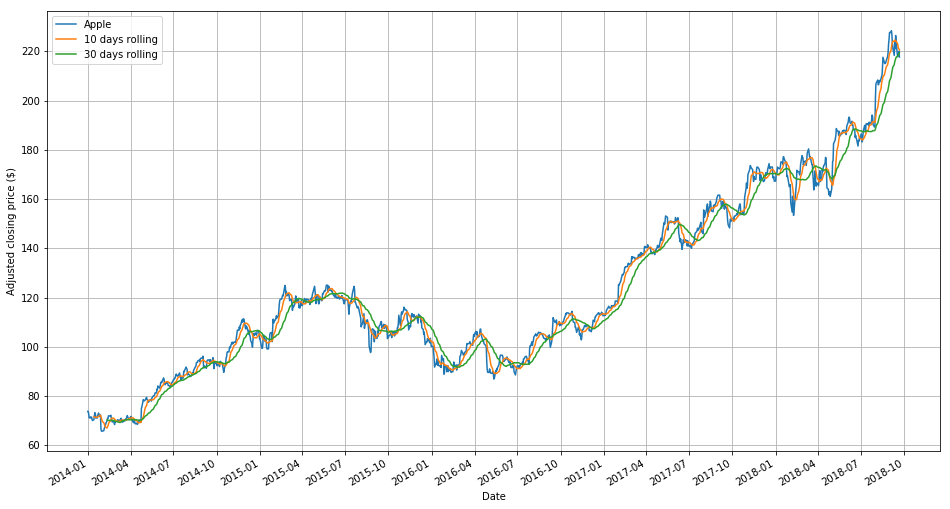

In [10]:
# plot everything
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close_appl.index.to_pydatetime(), close_appl, label='Apple')
ax.plot(close_appl.index.to_pydatetime(), short_mavg, label='10 days rolling')
ax.plot(close_appl.index.to_pydatetime(), long_mavg, label='30 days rolling')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel('Adjusted closing price ($)')
fig.autofmt_xdate()
ax.grid()
ax.legend(loc='best')

In [11]:
# Relative returns
relative_close = close.pct_change()
relative_close.head()

,AAPL,MSFT,F
2013-12-31,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,-0.014064,-0.006681,0.000654
2014-01-03,-0.021965,-0.006729,0.004533
2014-01-06,0.005453,-0.021131,0.004513


In [12]:
relative_log_returns = np.log(close).diff()
relative_log_returns.head()

,AAPL,MSFT,F
2013-12-31,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,-0.014164,-0.006704,0.000654
2014-01-03,-0.022210,-0.006752,0.004523
2014-01-06,0.005438,-0.021357,0.004502


# Cumulative log returns

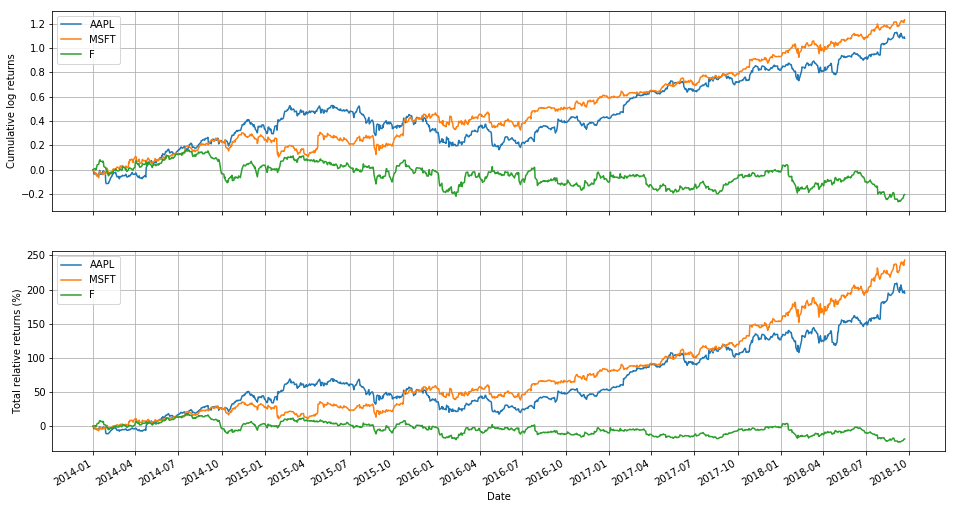

In [13]:
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16,9))

# cumsum sums everything till the pointing row
for equity in relative_log_returns:
    ax_1.plot(
        relative_log_returns[equity].index.to_pydatetime(), 
        relative_log_returns[equity].cumsum(), 
        label=str(equity)
    )
ax_1.set_ylabel('Cumulative log returns')
ax_1.set_xlabel('Date')
ax_1.grid()
ax_1.legend(loc='best')
ax_1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# log relative to relative can be expressed as e^(log_relative) - 1
for equity in relative_log_returns:
    ax_2.plot(
        relative_log_returns[equity].index.to_pydatetime(),
        100 * (np.exp(relative_log_returns[equity].cumsum()) - 1),
        label=str(equity)
    )
ax_2.set_ylabel('Total relative returns (%)')
ax_2.set_xlabel('Date')
ax_2.grid()
ax_2.legend(loc='best')
ax_2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.autofmt_xdate()

In [14]:
# Last day returns. Make this a column vector
r_t = relative_log_returns.tail(1).transpose()
r_t

,2018-09-21 00:00:00
AAPL,-0.010830
MSFT,0.006057
F,0.004069


In [15]:
# weight the equities
weight_vec = pd.DataFrame(data=1/3, index=r_t.index, columns=r_t.columns)
weight_vec

,2018-09-21 00:00:00
AAPL,0.333333
MSFT,0.333333
F,0.333333


In [16]:
# Total logreturn of the portfolio
portfolio_log_return = weight_vec.transpose().dot(r_t)
portfolio_log_return

,2018-09-21 00:00:00
2018-09-21,-0.000234


In [17]:
# Full analysis
weight_vec = pd.DataFrame(
    data=1/3,
    index=relative_log_returns.index.to_pydatetime(),
    columns=relative_log_returns.columns
)
weight_vec.head()

,AAPL,MSFT,F
2013-12-31,0.333333,0.333333,0.333333
2014-01-01,0.333333,0.333333,0.333333
2014-01-02,0.333333,0.333333,0.333333
2014-01-03,0.333333,0.333333,0.333333
2014-01-06,0.333333,0.333333,0.333333


In [18]:
# we are only intrested in diagonal values
tmp_var = weight_vec.dot(relative_log_returns.transpose())
tmp_var.head().iloc[:, :5]

,2013-12-31 00:00:00,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00
2013-12-31,NaN,0.0,-0.006738,-0.008146,-0.003806
2014-01-01,NaN,0.0,-0.006738,-0.008146,-0.003806
2014-01-02,NaN,0.0,-0.006738,-0.008146,-0.003806
2014-01-03,NaN,0.0,-0.006738,-0.008146,-0.003806
2014-01-06,NaN,0.0,-0.006738,-0.008146,-0.003806


In [19]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(tmp_var), index=relative_log_returns.index)
portfolio_log_returns.tail()

2018-09-17   -0.009123
2018-09-18    0.004761
2018-09-19    0.002610
2018-09-20    0.009079
2018-09-21   -0.000234
Freq: B, dtype: float64

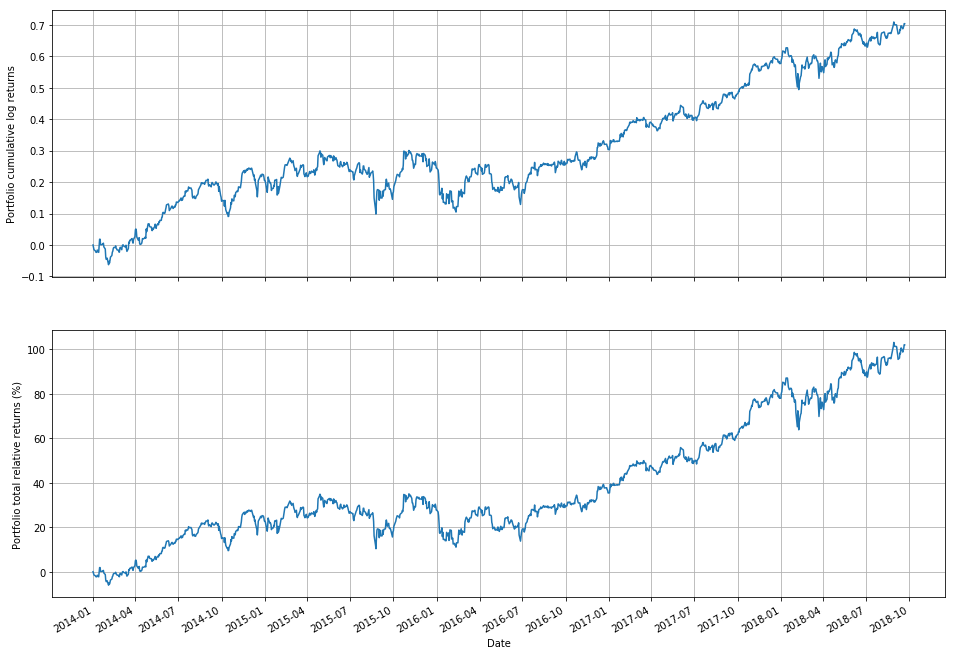

In [20]:
total_relative_returns = np.exp(portfolio_log_returns.cumsum()) - 1
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16,12))

ax_1.plot(portfolio_log_returns.index.to_pydatetime(), portfolio_log_returns.cumsum())
ax_1.set_ylabel('Portfolio cumulative log returns')
ax_1.set_xlabel('Date')
ax_1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_1.grid()

ax_2.plot(total_relative_returns.index.to_pydatetime(), 100 * total_relative_returns)
ax_2.set_ylabel('Portfolio total relative returns (%)')
ax_2.set_xlabel('Date')
ax_2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_2.grid()

fig.autofmt_xdate()

In [21]:
# Calculating the time-related parameters of the simulation
week_days_per_year = 260
days_in_simulation = total_relative_returns.shape[0]
num_of_years = days_in_simulation / week_days_per_year

# the last sample in total relative returns will give us the total portfolio return
total_portfolio_return = total_relative_returns.tail(1).values[0]
# Average portfolio return assuming compunding of returns
average_annual_return = (1 + total_portfolio_return) ** (1 / num_of_years) - 1

print('Total portfolio return is: {:5.2f}%'.format(100 * total_portfolio_return))
print('Average yearly return is: {:5.2f}%'.format(100 * average_annual_return))

Total portfolio return is: 102.02%
Average yearly return is: 15.97%
